In [1]:
import cv2 as cv
import math as math
from PIL import Image
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
import pandas as pd
import glob
import csv as csv
import seaborn as sns

In [2]:
path = (r'D:\Clemson Spring 21\6620 Digital Automotive Manufacturing\Final Project\Harshal')
frame1 = pd.read_csv('Frame1.csv')
frame2 = pd.read_csv('Frame2.csv')
frame3 = pd.read_csv('Frame3.csv')
frame1['Area'] = frame1.Area.interpolate(limit = 9, limit_area = 'inside')
frame2['Area'] = frame2.Area.interpolate(limit = 9, limit_area = 'inside')
frame3['Area'] = frame3.Area.interpolate(limit = 9, limit_area = 'inside')
frame1 = frame1.rename(columns = {'Tail length': 'TailLength'})
frame2 = frame2.rename(columns = {'Tail length': 'TailLength'})
frame3 = frame3.rename(columns = {'Tail length': 'TailLength'})

frame = frame1
frame = frame.append(frame2, ignore_index = True)
frame = frame.append(frame3, ignore_index = True)
print(frame.tail())
len(frame)

#frame = pd.concat(frame1,frame2,frame3)

         Layer    Time       X       Y    degrees      Speed  P  T  Area  \
3100603    240  8.7022 -5.3545  9.0075 -26.565051  20.124612  0  0   NaN   
3100604    240  8.7023 -5.3536  9.0057 -23.962489  20.124612  0  0   NaN   
3100605    240  8.7024 -5.3528  9.0039 -26.565051  19.697716  0  0   NaN   
3100606    240  8.7025 -5.3519  9.0021 -26.565051  20.124612  0  0   NaN   
3100607    240  8.7026 -5.3510  9.0003   0.000000  20.124612  0  0   NaN   

         TailLength  Splatter  
3100603         NaN       NaN  
3100604         NaN       NaN  
3100605         NaN       NaN  
3100606         NaN       NaN  
3100607         NaN       NaN  


3100608

In [3]:
print(frame.isnull().sum())

Layer               0
Time                0
X                   0
Y                   0
degrees             0
Speed               0
P                   0
T                   0
Area          1461765
TailLength    2936721
Splatter      2936721
dtype: int64


In [4]:
for col in frame.columns:
    print(f"{col}: {round(100*frame[col].isnull().mean(),2)}%")

Layer: 0.0%
Time: 0.0%
X: 0.0%
Y: 0.0%
degrees: 0.0%
Speed: 0.0%
P: 0.0%
T: 0.0%
Area: 47.14%
TailLength: 94.71%
Splatter: 94.71%


In [5]:
# for i in range(len(frame)):
#     if frame.TailLength.at[i] < 0:
#         frame.TailLength.at[i] == None
frame.TailLength = frame.TailLength.clip(lower=0)

In [6]:
frame.TailLength = frame.TailLength.interpolate(limit = 9, limit_area = 'inside')
frame.Splatter = frame.Splatter.interpolate(limit=9, limit_area = 'inside', method = 'pad')

In [7]:
for i in range(len(frame)):
    if np.isnan(frame.at[i,'Area']):
        frame.at[i,'Speed'] = None
print(frame.isnull().sum())

Layer               0
Time                0
X                   0
Y                   0
degrees             0
Speed         1461765
P                   0
T                   0
Area          1461765
TailLength    1461747
Splatter      1461738
dtype: int64


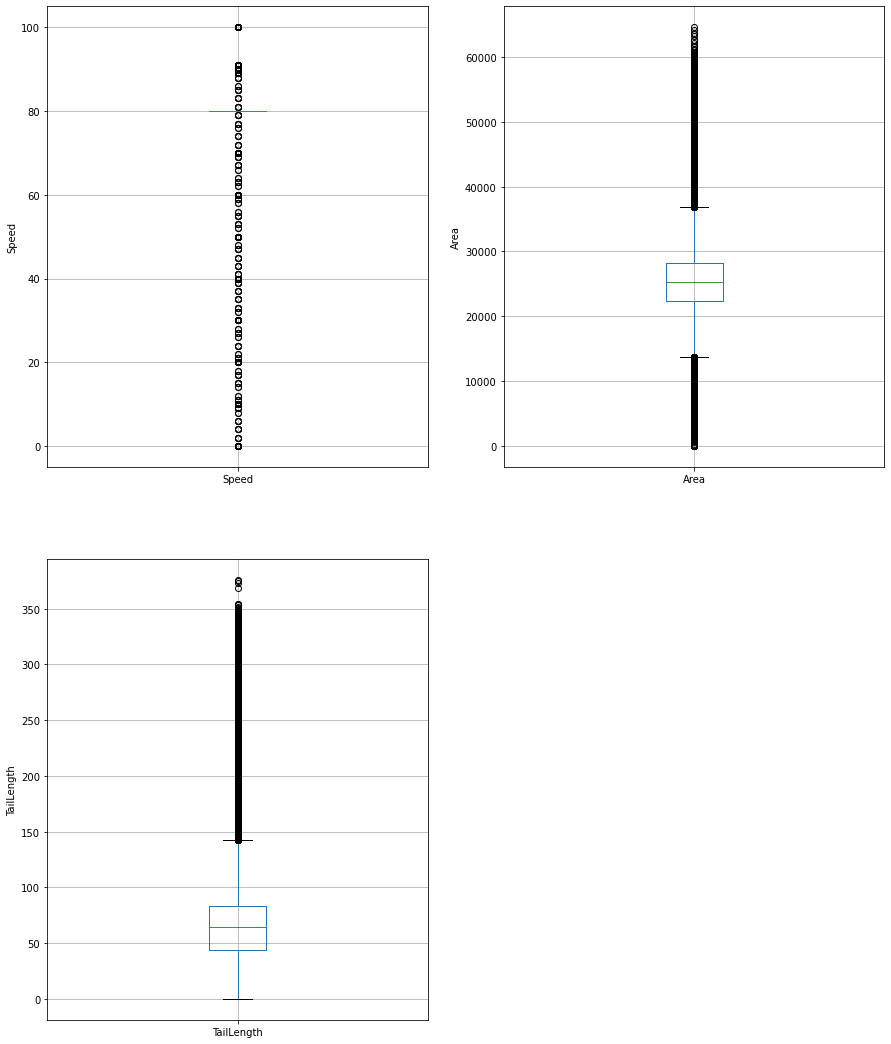

In [8]:
boxplot_variables = ['Speed','Area','TailLength']

plt.figure(figsize=(15,100))
for count, n in enumerate(boxplot_variables):

    plt.subplot(10,2,count+1)
    fig = frame.boxplot(column=boxplot_variables[count])
    fig.set_title('')
    fig.set_ylabel(boxplot_variables[count])

In [9]:
print(frame.isnull().sum())

Layer               0
Time                0
X                   0
Y                   0
degrees             0
Speed         1461765
P                   0
T                   0
Area          1461765
TailLength    1461747
Splatter      1461738
dtype: int64


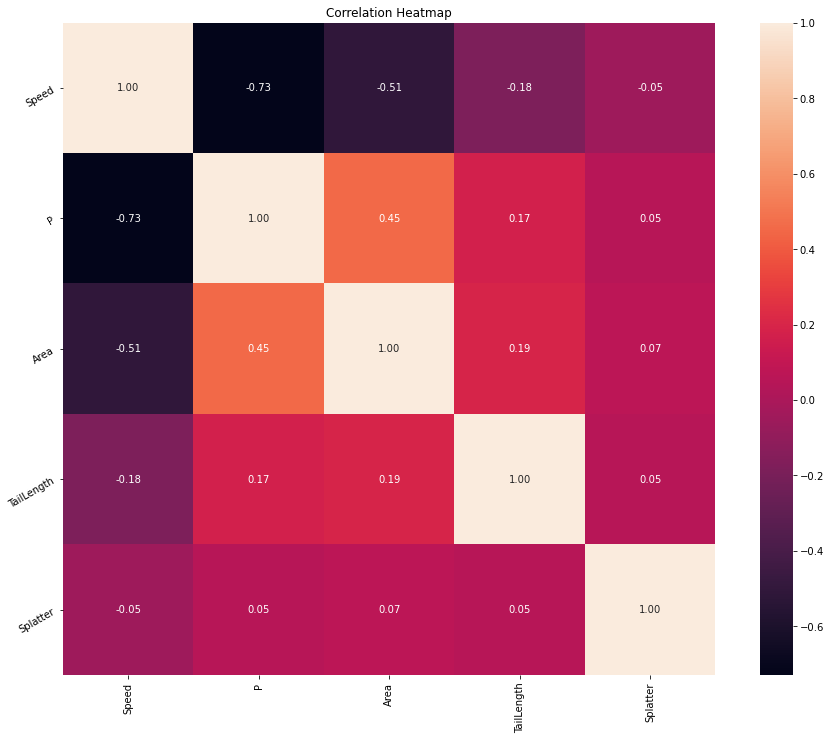

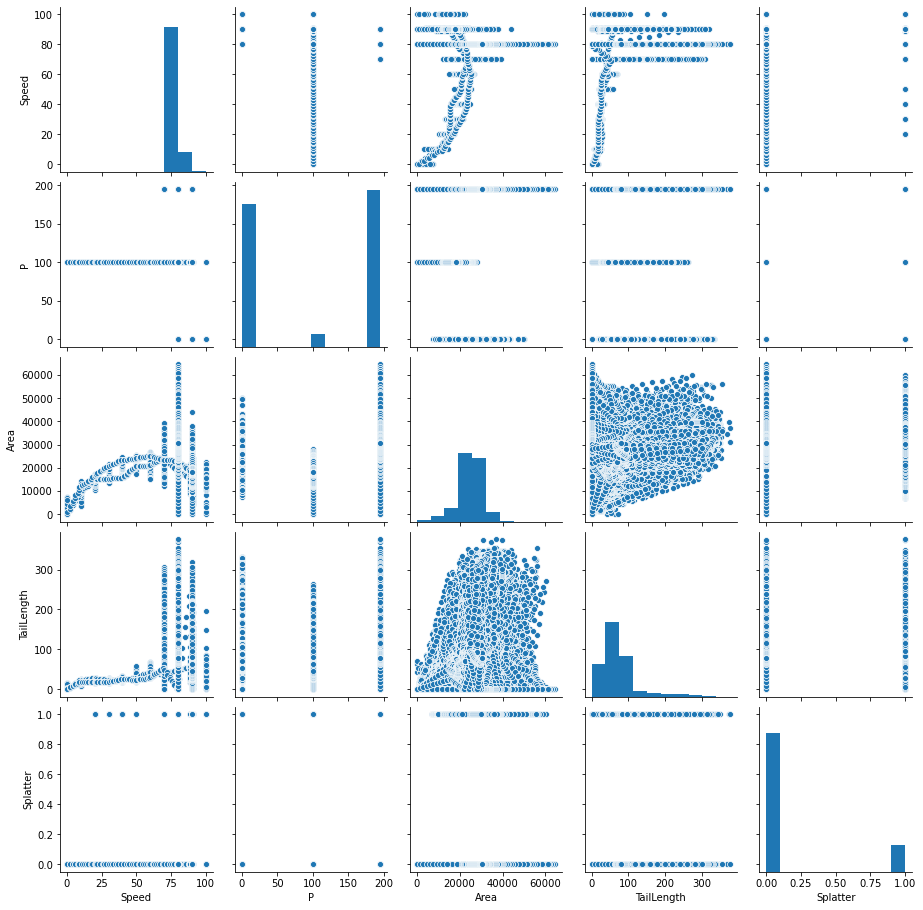

In [10]:

correlation_variables = ['Speed','P','Area','TailLength','Splatter']
correlation = frame[correlation_variables].corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

# Plot the pair plots ONLY for the numerical variables
sns.pairplot(frame[correlation_variables], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()